In [1]:
import kagglehub
shantanudhakadd_email_spam_detection_dataset_classification_path = kagglehub.dataset_download('shantanudhakadd/email-spam-detection-dataset-classification')

print('Data source import complete.')


100%|██████████| 211k/211k [00:00<00:00, 591kB/s]

Extracting files...
Data source import complete.


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Importing the Libraries & Loading data </span></b>

In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:
#Load data & print samples
df = pd.read_csv('spam msgs.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#Let's drop the non-relevant unnamed columns
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Exploratory Data Analysis</span></b>

In [7]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 5572


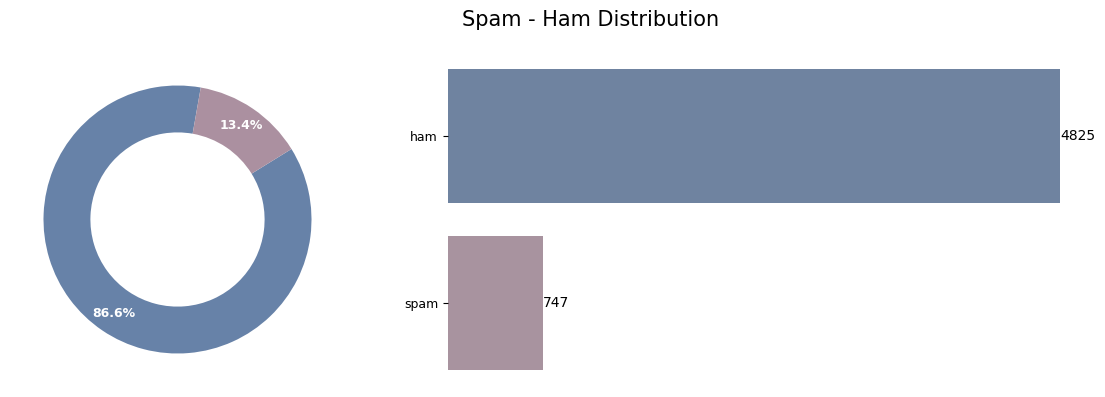

In [8]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
colors =["#6782a8", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=df, y=df['Category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Ham Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [9]:
#Descriptive Summary of the dataset
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
    
- The dataset has **4825 emails (86.6%)** labled as Ham while **747 (13.4%)** labaled as Spam.
- "ham" is the predominant category.
- The dataset contains 5,169 unique texts.
- The most frequent text being "Sorry, I'll call later," occurring 30 times.

In [10]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
display(df.head())


,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# ! pip install wordcloud

## <b><span style='color:#28838a'> </span><span style='color:#fc7651'> Word Cloud : Spam vs Ham </span></b>

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Bag of Words </span></b>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [13]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(3900, 8672)

'X-Test :'

(1672, 8672)

'Y-Train :'

(3900,)

'X-Test :'

(1672,)

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Training the ML models </span></b>

### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Neural Network </span></b>

In [14]:
import pickle

In [15]:

from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)
with open("mlp_classifier_model.pkl", "wb") as f:
    pickle.dump(mlp_classifier_model, f)
# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))


MLP Classifier
Accuracy score: 0.98
Precision score: 0.97
Recall score: 0.90
F1 score: 0.94


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Multinomial Naive Bayes </span></b>

### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Confusion Matrix </span></b>

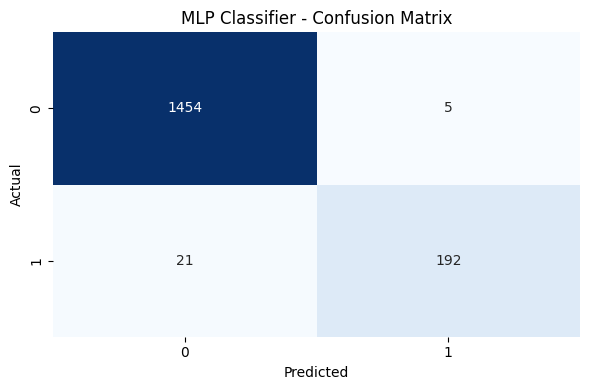

In [20]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
prediction = mlp_classifier_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("MLP Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Metric Comparison Heatmap </span></b>

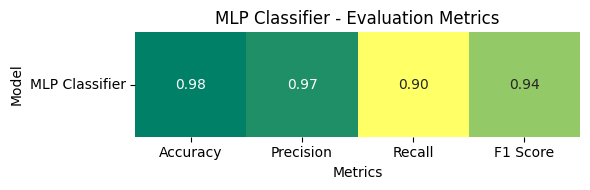

In [21]:
#Metric Comparison Heatmap
prediction = mlp_classifier_model.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

# Prepare data
metric_data = [[accuracy, precision, recall, f1]]
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Plot heatmap
plt.figure(figsize=(6, 2))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r",
            xticklabels=metric_labels, yticklabels=["MLP Classifier"])
plt.title("MLP Classifier - Evaluation Metrics")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [22]:
import pickle

with open("mlp_classifier_model.pkl", "rb") as f:
    mlp_model = pickle.load(f)

In [31]:
def predict_spam(text_input):
    text_vector = count.transform([text_input])
    prediction = mlp_classifier_model.predict(text_vector)[0]
    return {"MLP Classifier": "Spam" if prediction == 1 else "Not Spam"}

In [33]:
sample_messages = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize.",
    "Hi, can we meet at 4 PM today to discuss the project?",
    "Urgent! Your ATM card has been blocked. Click the link to verify your account.",
]

for msg in sample_messages:
    print(f"\nMessage: {msg}")
    result = predict_spam(msg)
    for model, prediction in result.items():
        print(f"Prediction: {prediction}")


Message: Congratulations! You've won a free iPhone. Click here to claim your prize.
Prediction: Spam

Message: Hi, can we meet at 4 PM today to discuss the project?
Prediction: Not Spam

Message: Urgent! Your ATM card has been blocked. Click the link to verify your account.
Prediction: Spam
